<h1>沒使用影片</h1>
<p>為了這專題每天熬夜，身上的病更嚴重了呢，心臟也變得更糟糕了呢

15


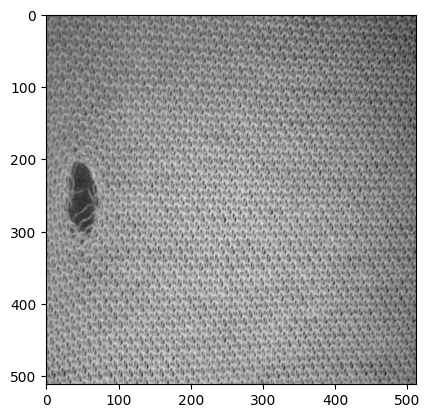

23


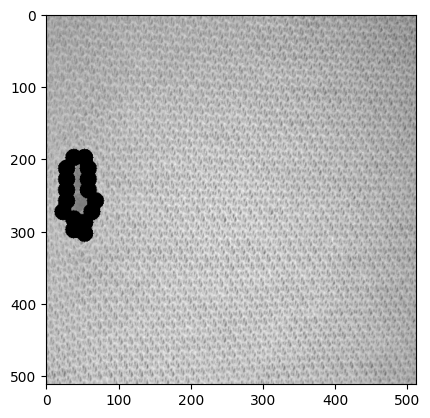

33


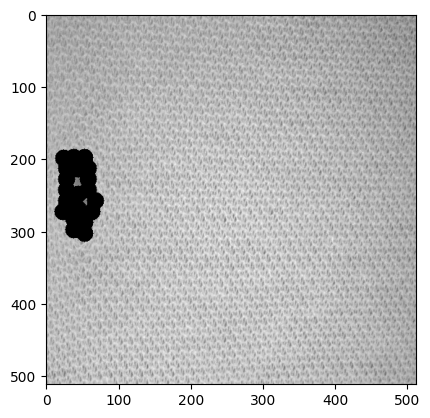

17


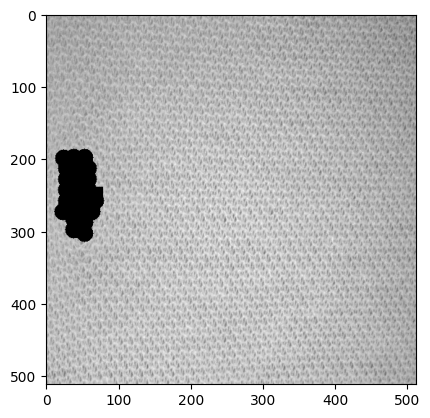

40


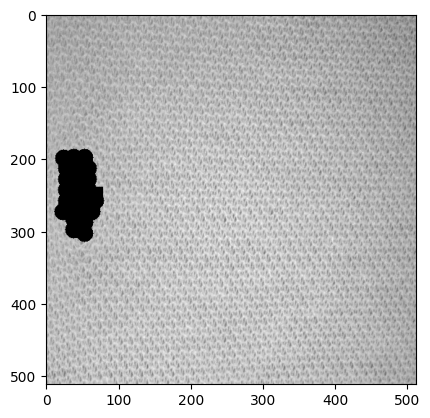

{15: 0, 23: 16, 33: 4}
final


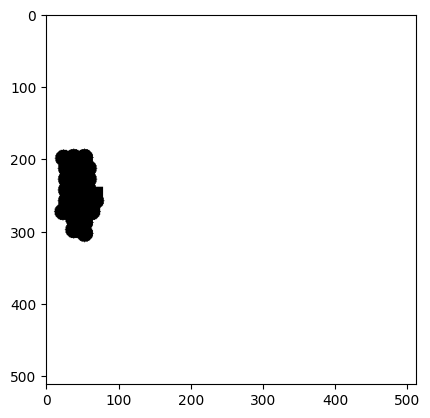

True

In [1]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
import time

image = cv2.imread('image2.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#size_filter = 15
x, y = image.shape[:2]
#print(x,y)

new_img = image.copy()


def lot_filter(size_filter, g, offset, count):
    print(size_filter)
    
    x_filter = int((x)/offset)
    y_filter = int((y)/offset)

    end_r = x - size_filter + offset
    end_c = y - size_filter + offset

    co_contrast = np.zeros((x_filter ,y_filter))
    co_homogeneity = np.zeros((x_filter ,y_filter))
    co_correlation = np.zeros((x_filter ,y_filter))

    for i in range(0, end_r, offset):
        for j in range(0, end_c, offset):
            f = image[ i : i + size_filter , j : j + size_filter ]
            result = graycomatrix( f, [1],[0] )
            co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
            co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
            co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))

    for i in range(0, x_filter):
        for j in range(0, y_filter):
            # Detect is there already had cover around 
            has_print = 0
            # Count there already had cover around yet
            # To judge the filter size 17 should it be cover the loss from above filter
            temp = 0

            match size_filter:
                # initial detection
                # test by img154 from texture_video
                case 15:
                    if co_correlation[i,j] < 0.1955023234021762:
                            if co_contrast[i,j] > 10:  
                                if co_homogeneity[i,j] < 0.28:
                                    cv2.circle(g,( j*offset+6 , i*offset+6 ),10 ,0,-1)
                                    count[15]+=1

                # Detect the hole edge 
                # Test by image2 and img154 from texture_video
                case 23:
                    if co_correlation[i,j] > 0.809:
                        if co_contrast[i,j] > 35:
                            if co_homogeneity[i,j] < 0.31:
                                if(count[15] > 15):
                                    for k in range(0, 10):
                                        if(has_print):
                                            break

                                        for l in range(0, 10):
                                            if(new_img[i+k, j+l] == 0):
                                                has_print = 1
                                                break

                                    if(not has_print):
                                        if co_correlation[i,j] > 0.8079:
                                            if co_contrast[i,j] > 35:
                                                if co_homogeneity[i,j] < 0.45:
                                                    cv2.circle(new_img,( j*offset+8 , i*offset+8 ),21 ,0,-1)

                                else:
                                    for k in range(0, 7):
                                        if(has_print):
                                            break

                                        for l in range(0, 7):
                                            # skip the pixel nearby center of circle
                                            if(not k==3 and not l==3):
                                                if(i*offset+5+k < x and j*offset+5+l < y):
                                                    if(g[i*offset+5+k, j*offset+5+l] == 0):
                                                        has_print = 1
                                                        break

                                if(not has_print):
                                    cv2.circle(g,( j*offset+8 , i*offset+8 ), 12 , 0, -1)
                                    count[23]+=1
                                
                # Detect the loss those filter size 23 didn't cover 
                # Test by img154 and img172 from texture_video
                case 33:
                    if co_correlation[i,j] > 0.89:
                        for k in range(0, 7):
                            if(has_print):
                                break

                            for l in range(0, 7):
                                # skip the pixel nearby center of circle
                                if(not(3<=k<=5 and not 3<=l<=5)):
                                    if(i*offset+k < x and j*offset+l < y):
                                        if(g[i*offset+k, j*offset+l] == 0):
                                            has_print = 1
                                            break

                        if(not has_print):
                            cv2.circle(g,( j*offset+4 , i*offset+4 ), 12 , 0, -1)
                            count[33]+=1

                # Detect the line
                # Test by image1
                case 17:
                    if co_correlation[i,j] > 0.744:
                        if co_contrast[i,j] > 20:
                            if co_homogeneity[i,j] < 0.4:
                                for k in range(-2, 10):
                                    if(has_print):
                                        break

                                    for l in range(-2, 10):
                                        if(not (-1<=k<=8 and -1<=l<=8)):
                                            if(i*offset+k < x and j*offset+l < y):
                                                if(g[i*offset+k, j*offset+l] == 0):
                                                    has_print = 1
                                                    temp+=1

                                if(temp < 9):
                                    has_print = 0

                                if(not has_print):
                                    cv2.rectangle(g,( j*offset-6 , i*offset-6 ),( j*offset+13 , i*offset+13 ) , 0, -1)

                # Detect the loss those filter size 17 didn't cover
                case 22:
                    if co_correlation[i,j] > 0.72:
                        if co_contrast[i,j] > 25:
                            if co_homogeneity[i,j] < 0.3:
                                for k in range(8, 10):
                                    if(has_print):
                                        break

                                    for l in range(8, 10):
                                        if(i*offset-5+k < x and j*offset-5+l < y):
                                            if(not (k==9 and l==9)):
                                                if(g[i*offset-5+k, j*offset-5+l] == 0):
                                                    has_print = 1

                                if(not has_print):
                                    cv2.rectangle(g,( j*offset-5 , i*offset-5 ),( j*offset+13 , i*offset+13 ) , 0, -1)

                # Detect the line
                # Test by img313 from texture_video
                case 40:
                    if 0.8099011884285607 < co_correlation[i,j]:
                        if 25.976282051282055 < co_contrast[i,j]:
                            if co_homogeneity[i,j] < 0.32:
                                for l in range(10, 19):
                                    if(has_print):
                                        break

                                    for k in range(10, 19):
                                        if(i*offset+l < x and j*offset+k < y):
                                            if(not(13<=k<=15 and 13<=l<=15)):
                                                if(g[i*offset+l][j*offset+k] == 0):
                                                    has_print = 1
                                                    break

                                if(not has_print):
                                    cv2.rectangle(g,( j*offset , i*offset ),( j*offset+28 , i*offset+28 ) , 0, -1)

    plt.imshow(g, cmap='gray')
    plt.show()

    return g, count

count = {15:0, 23: 0, 33:0}

new_img, count = lot_filter(15, new_img, 5, count)
new_img, count = lot_filter(23, new_img, 5, count)
new_img, count = lot_filter(33, new_img, 5, count)

# Because part of the line detection was written by another person, it is weak. 
# It will also detect the flawless ones, so it is restricted. 
# If the first three basically do not detect anything, it will be skipped.
if(25 > count[15] + count[23] + count[33] >0):
    new_img = lot_filter(17, new_img, 5, count)[0]

# Because filter 22 it seems useless, so skip
#new_img = lot_filter(22, new_img, 5)

new_img = lot_filter(40, new_img, 3, count)[0]

print(count)

for i in range(x):
    for j in range(y):
        if(new_img[i,j] > 0):
            new_img[i,j] = 255

print("final")
plt.imshow(new_img, cmap='gray')
plt.show()
cv2.imwrite("./result.png", new_img)


<h1>使用影片</h1>

In [ ]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
import time
import os

def get_images_from_video(video_name, time_F):
    video_images = []
    vc = cv2.VideoCapture(video_name)
    c = 1
    
    if vc.isOpened(): 
        rval, video_frame = vc.read()
    else:
        rval = False

    while rval:
        rval, video_frame = vc.read()
        
        if(c % time_F == 0):
            video_images.append(video_frame)     
        c = c + 1
    vc.release()
    
    return video_images

time_F = 5
video_name = 'texture_video.avi' 
video_images = get_images_from_video(video_name, time_F)

for i in range(0, len(video_images)):
    cv2.imwrite( "./img/img"+str(i+1)+".png", video_images[i])
    

def lot_filter(size_filter, g, offset, count):
    print(size_filter)
    
    x_filter = int((x)/offset)
    y_filter = int((y)/offset)

    end_r = x - size_filter + offset
    end_c = y - size_filter + offset

    co_contrast = np.zeros((x_filter ,y_filter))
    co_homogeneity = np.zeros((x_filter ,y_filter))
    co_correlation = np.zeros((x_filter ,y_filter))

    for i in range(0, end_r, offset):
        for j in range(0, end_c, offset):
            f = image[ i : i + size_filter , j : j + size_filter ]
            result = graycomatrix( f, [1],[0] )
            co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
            co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
            co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))

    for i in range(0, x_filter):
        for j in range(0, y_filter):
            # Detect is there already had cover around 
            has_print = 0
            # Count there already had cover around yet
            # To judge the filter size 17 should it be cover the loss from above filter
            temp = 0

            match size_filter:
                # initial detection
                # test by img154 from texture_video
                case 15:
                    if co_correlation[i,j] < 0.1955023234021762:
                            if co_contrast[i,j] > 10:  
                                if co_homogeneity[i,j] < 0.28:
                                    cv2.circle(g,( j*offset+6 , i*offset+6 ),10 ,0,-1)
                                    count[15]+=1

                # Detect the hole edge 
                # Test by image2 and img154 from texture_video
                case 23:
                    if co_correlation[i,j] > 0.809:
                        if co_contrast[i,j] > 35:
                            if co_homogeneity[i,j] < 0.31:
                                if(count[15] > 15):
                                    for k in range(0, 10):
                                        if(has_print):
                                            break

                                        for l in range(0, 10):
                                            if(new_img[i+k, j+l] == 0):
                                                has_print = 1
                                                break

                                    if(not has_print):
                                        if co_correlation[i,j] > 0.8079:
                                            if co_contrast[i,j] > 35:
                                                if co_homogeneity[i,j] < 0.45:
                                                    cv2.circle(new_img,( j*offset+8 , i*offset+8 ),21 ,0,-1)

                                else:
                                    for k in range(0, 7):
                                        if(has_print):
                                            break

                                        for l in range(0, 7):
                                            # skip the pixel nearby center of circle
                                            if(not k==3 and not l==3):
                                                if(i*offset+5+k < x and j*offset+5+l < y):
                                                    if(g[i*offset+5+k, j*offset+5+l] == 0):
                                                        has_print = 1
                                                        break

                                if(not has_print):
                                    cv2.circle(g,( j*offset+8 , i*offset+8 ), 12 , 0, -1)
                                    count[23]+=1
                                
                # Detect the loss those filter size 23 didn't cover 
                # Test by img154 and img172 from texture_video
                case 33:
                    if co_correlation[i,j] > 0.89:
                        for k in range(0, 7):
                            if(has_print):
                                break

                            for l in range(0, 7):
                                # skip the pixel nearby center of circle
                                if(not(3<=k<=5 and not 3<=l<=5)):
                                    if(i*offset+k < x and j*offset+l < y):
                                        if(g[i*offset+k, j*offset+l] == 0):
                                            has_print = 1
                                            break

                        if(not has_print):
                            cv2.circle(g,( j*offset+4 , i*offset+4 ), 12 , 0, -1)
                            count[33]+=1

                # Detect the line
                # Test by image1
                case 17:
                    if co_correlation[i,j] > 0.744:
                        if co_contrast[i,j] > 20:
                            if co_homogeneity[i,j] < 0.4:
                                for k in range(-2, 10):
                                    if(has_print):
                                        break

                                    for l in range(-2, 10):
                                        if(not (-1<=k<=8 and -1<=l<=8)):
                                            if(i*offset+k < x and j*offset+l < y):
                                                if(g[i*offset+k, j*offset+l] == 0):
                                                    has_print = 1
                                                    temp+=1

                                if(temp < 9):
                                    has_print = 0

                                if(not has_print):
                                    cv2.rectangle(g,( j*offset-6 , i*offset-6 ),( j*offset+13 , i*offset+13 ) , 0, -1)

                # Detect the loss those filter size 17 didn't cover
                case 22:
                    if co_correlation[i,j] > 0.72:
                        if co_contrast[i,j] > 25:
                            if co_homogeneity[i,j] < 0.3:
                                for k in range(8, 10):
                                    if(has_print):
                                        break

                                    for l in range(8, 10):
                                        if(i*offset-5+k < x and j*offset-5+l < y):
                                            if(not (k==9 and l==9)):
                                                if(g[i*offset-5+k, j*offset-5+l] == 0):
                                                    has_print = 1

                                if(not has_print):
                                    cv2.rectangle(g,( j*offset-5 , i*offset-5 ),( j*offset+13 , i*offset+13 ) , 0, -1)

                # Detect the line
                # Test by img313 from texture_video
                case 40:
                    if 0.8099011884285607 < co_correlation[i,j]:
                        if 25.976282051282055 < co_contrast[i,j]:
                            if co_homogeneity[i,j] < 0.32:
                                for l in range(10, 19):
                                    if(has_print):
                                        break

                                    for k in range(10, 19):
                                        if(i*offset+l < x and j*offset+k < y):
                                            if(not(13<=k<=15 and 13<=l<=15)):
                                                if(g[i*offset+l][j*offset+k] == 0):
                                                    has_print = 1
                                                    break

                                if(not has_print):
                                    cv2.rectangle(g,( j*offset , i*offset ),( j*offset+28 , i*offset+28 ) , 0, -1)

    plt.imshow(g, cmap='gray')
    plt.show()

    return g, count

start = time.time()

for i in range(1087):
    #photo1-1087
    num = i+1
    image = cv2.imread('./img/img'+str(num)+'.png')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    x, y = image.shape[:2]

    new_img = image.copy()

    count = {15:0, 23: 0, 33:0}

    new_img, count = lot_filter(15, new_img, 5, count)
    new_img, count = lot_filter(23, new_img, 5, count)
    new_img, count = lot_filter(33, new_img, 5, count)

    # Because part of the line detection was written by another person, it is weak. 
    # It will also detect the flawless ones, so it is restricted. 
    # If the first three basically do not detect anything, it will be skipped.
    if(25 > count[15] + count[23] + count[33] >0):
        new_img = lot_filter(17, new_img, 5, count)[0]

    # Because filter 22 it seems useless, so skip
    #new_img = lot_filter(22, new_img, 5)

    new_img = lot_filter(40, new_img, 3, count)[0]
    
    for i in range(x):
        for j in range(y):
            if(new_img[i,j] > 0):
                new_img[i,j] = 255
    
    end = time.time()
    print("time: %f seconds" % (end-start))
    #plt.imshow(new_img, camp='gray')
    #plt.show()

    cv2.imwrite( "./result/result"+str(num)+".png", new_img)

path = "./result/"
filelist = os.listdir(path)
fps = 2 
size = (800, 600) 

video = cv2.VideoWriter("VideoTest1.avi", 
        cv2.VideoWriter_fourcc('I', '4', '2', '0'), fps, size)

for item in filelist:
    if item.endswith('.png'): 

        item = path + item
        img = cv2.imread(item)
        video.write(img)

video.release()
cv2.destroyAllWindows()
